In [1]:

# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import re 
import datetime
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer 
from nltk.corpus import stopwords
%matplotlib inline


In [2]:
loan_data_df = pd.read_csv('loan_data.csv')
#Check training columns
print(loan_data_df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [3]:
loan_data_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#Remove all rows that have at least one null value
loan_data_df = loan_data_df.dropna()
loan_data_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
# Find null values
for column in loan_data_df.columns:
    print(f"Column {column} has {loan_data_df[column].isnull().sum()} null values")

Column Loan_ID has 0 null values
Column Gender has 0 null values
Column Married has 0 null values
Column Dependents has 0 null values
Column Education has 0 null values
Column Self_Employed has 0 null values
Column ApplicantIncome has 0 null values
Column CoapplicantIncome has 0 null values
Column LoanAmount has 0 null values
Column Loan_Amount_Term has 0 null values
Column Credit_History has 0 null values
Column Property_Area has 0 null values
Column Loan_Status has 0 null values


In [6]:
#Since the Credit_History do not contribute to the analysis of the data, delete the Credit_History from the original dataframe
loan_data_df = loan_data_df.drop(columns=["Loan_ID", "Gender", "Education", "Credit_History", "Property_Area", ])
loan_data_df

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
1,Yes,1.0,No,4583,1508.0,128.0,360.0,N
2,Yes,0.0,Yes,3000,0.0,66.0,360.0,Y
3,Yes,0.0,No,2583,2358.0,120.0,360.0,Y
4,No,0.0,No,6000,0.0,141.0,360.0,Y
5,Yes,2.0,Yes,5417,4196.0,267.0,360.0,Y
...,...,...,...,...,...,...,...,...
609,No,0.0,No,2900,0.0,71.0,360.0,Y
610,Yes,3.0,No,4106,0.0,40.0,180.0,Y
611,Yes,1.0,No,8072,240.0,253.0,360.0,Y
612,Yes,2.0,No,7583,0.0,187.0,360.0,Y


In [7]:
# Split the columns into quantitative and categorical
all_columns = set(loan_data_df.columns)
all_quantitative_columns = set(loan_data_df.describe().columns)
all_categorical_columns = all_columns - all_quantitative_columns
all_categorical_columns

{'Loan_Status', 'Married', 'Self_Employed'}

In [8]:
# Converting Loan_Status to 0 and 1
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() 
loan_data_df['Loan_Status'] = lb.fit_transform(loan_data_df['Loan_Status'])
loan_data_df['Married'] = lb.fit_transform(loan_data_df['Married'])
loan_data_df['Self_Employed'] = lb.fit_transform(loan_data_df['Self_Employed'])
loan_data_df

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
1,1,1.0,0,4583,1508.0,128.0,360.0,0
2,1,0.0,1,3000,0.0,66.0,360.0,1
3,1,0.0,0,2583,2358.0,120.0,360.0,1
4,0,0.0,0,6000,0.0,141.0,360.0,1
5,1,2.0,1,5417,4196.0,267.0,360.0,1
...,...,...,...,...,...,...,...,...
609,0,0.0,0,2900,0.0,71.0,360.0,1
610,1,3.0,0,4106,0.0,40.0,180.0,1
611,1,1.0,0,8072,240.0,253.0,360.0,1
612,1,2.0,0,7583,0.0,187.0,360.0,1


In [9]:
# Drop the label to create the X data
X = loan_data_df.drop(['Loan_Status'], axis=1)
y = loan_data_df['Loan_Status']

In [10]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X)

In [11]:
X_scaled = X_scaler.transform(X)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=1)

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [14]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_predict = classifier.predict(X_test)
train_pred = classifier.predict(X_train)

In [16]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7219917012448133
Testing Data Score: 0.6652892561983471


<AxesSubplot:>

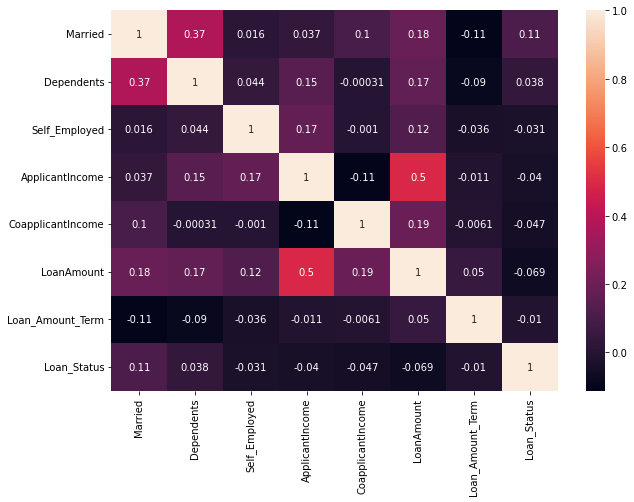

In [17]:
# Let's check the correlation between the variables 
plt.figure(figsize=(10,7)) 
sns.heatmap(loan_data_df.corr(),annot=True) 

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
#Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
#Create predictions from the test set and create a classification report and a confusion matrix.
y_predict = dtree.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.30      0.25      0.27        79
           1       0.66      0.71      0.69       163

    accuracy                           0.56       242
   macro avg       0.48      0.48      0.48       242
weighted avg       0.54      0.56      0.55       242



In [21]:
print(confusion_matrix(y_test, y_predict))

[[ 20  59]
 [ 47 116]]


In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rforest = RandomForestClassifier(n_estimators = 300)
rforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [24]:
y_predict = rforest.predict(X_test)

In [25]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.38      0.14      0.20        79
           1       0.68      0.89      0.77       163

    accuracy                           0.64       242
   macro avg       0.53      0.51      0.49       242
weighted avg       0.58      0.64      0.59       242



In [26]:
print(confusion_matrix(y_test,y_predict))

[[ 11  68]
 [ 18 145]]


In [27]:
#loan_data_df.to_csv("Main_Doc.csv", encoding='utf-8', index=False)

In [28]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.595
k: 3, Train/Test Score: 0.805/0.599
k: 5, Train/Test Score: 0.763/0.645
k: 7, Train/Test Score: 0.747/0.645
k: 9, Train/Test Score: 0.747/0.669
k: 11, Train/Test Score: 0.718/0.649
k: 13, Train/Test Score: 0.718/0.653
k: 15, Train/Test Score: 0.718/0.636
k: 17, Train/Test Score: 0.701/0.653
k: 19, Train/Test Score: 0.701/0.674


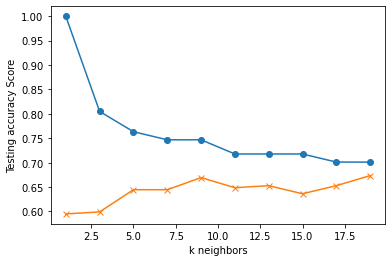

In [29]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [30]:
loan_data_df.to_pickle("dummy.pkl")